# Plots for the Report

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta

color_da_node = "#4477aa"
color_id_node = "#66ccee"
color_fcr_node = "#84CA90"
color_solar_node = "#ccbb44"
color_bess_node = "#ee7733"
color_sre_node = "#ee6677"
color_tre_node = "#aa3377"
color_else2 = "#bbbbbb"

# ------------------------ Load Excel ------------------------
repo_root = Path().resolve()
file_path_Okey_AG = repo_root / "Case_Plots_Sources" / f"2024_(Baseline)_Okey_AG-ReferenceData.xlsx"
file_path_ZEV_Waedenswil = repo_root / "Case_Plots_Sources" / f"2024_(Baseline)_ZEV_Waedenswil-ReferenceData.xlsx"
file_path_hpfc = repo_root / "Case_Plots_Sources" / "HPFC_EXTENDED_2040_weekday_adjusted.csv"
output_folder = repo_root / "output"

# Read the Excel file
#df_okey_ag = pd.read_excel(file_path_Okey_AG, sheet_name="Sheet1")
#df_zev_waedi = pd.read_excel(file_path_ZEV_Waedenswil, sheet_name="Sheet1")
df_hpfc = pd.read_csv(file_path_hpfc, sep=';')

In [23]:
# Filter excel file
selected_days = []   # e.g. [200,201,203]
selected_weeks = [40]       # e.g. [2, 10]
selected_months = []      # e.g. [1, 2]

def filter_dataframe(df, selected_days, selected_weeks, selected_months):
    # Ensure Timestamp is in datetime format
    df["Date"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d %H:%M")
    # ------------------------ Filtering ------------------------
    df["DayOfYear"] = df["Date"].dt.dayofyear
    df["Week"] = df["Date"].dt.isocalendar().week
    df["Month"] = df["Date"].dt.month


    if selected_days:
        filtered_df = df[df["DayOfYear"].isin(selected_days)]
    elif selected_weeks:
        filtered_df = df[df["Week"].isin(selected_weeks)]
    elif selected_months:
        filtered_df = df[df["Month"].isin(selected_months)]
    else:
        filtered_df = df.copy()
    #print(f"Filtered DataFrame shape: {filtered_df_2021.head(n=10)}")
    return filtered_df

#filtered_df_okey_ag = filter_dataframe(df_okey_ag, selected_days, selected_weeks, selected_months)
#filtered_df_zev_waedi = filter_dataframe(df_zev_waedi, selected_days, selected_weeks, selected_months)

In [24]:
# Filter csv file
selected_days = []   # e.g. [200,201,203]
selected_weeks = []       # e.g. [2, 10]
selected_months = []      # e.g. [1, 2]

def filter_dataframe_csv(df, selected_days, selected_weeks, selected_months):
    # The first column is the date, but has no column name. Assign it a name.
    if df.columns[0] != "Timestamp":
        df = df.rename(columns={df.columns[0]: "Timestamp"})
    if df.columns[1] != "Price":
        df = df.rename(columns={df.columns[1]: "Price"})
    # Try parsing with errors='coerce' to handle invalid dates
    df["Date"] = pd.to_datetime(df["Timestamp"], format="%d.%m.%Y %H:%M", errors='coerce')
    # Drop rows with invalid dates
    df = df.dropna(subset=["Date"])
    # ------------------------ Filtering ------------------------
    df["DayOfYear"] = df["Date"].dt.dayofyear
    df["Week"] = df["Date"].dt.isocalendar().week
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year

    if selected_days:
        filtered_df = df[df["DayOfYear"].isin(selected_days)]
    elif selected_weeks:
        filtered_df = df[df["Week"].isin(selected_weeks)]
    elif selected_months:
        filtered_df = df[df["Month"].isin(selected_months)]
    else:
        filtered_df = df.copy()
    #print(f"Filtered DataFrame shape: {filtered_df.head(n=10)}")
    return filtered_df

filtered_df_hpfc = filter_dataframe_csv(df_hpfc, selected_days, selected_weeks, selected_months)
print(filtered_df_hpfc.head(10))

          Timestamp   Price   1.0                Date  DayOfYear  Week  Month  \
0  01.01.2026 01:00   98,84   2.0 2026-01-01 01:00:00          1     1      1   
1  01.01.2026 02:00   89,40   3.0 2026-01-01 02:00:00          1     1      1   
2  01.01.2026 03:00   87,08   4.0 2026-01-01 03:00:00          1     1      1   
3  01.01.2026 04:00   82,76   5.0 2026-01-01 04:00:00          1     1      1   
4  01.01.2026 05:00   92,57   6.0 2026-01-01 05:00:00          1     1      1   
5  01.01.2026 06:00  109,73   7.0 2026-01-01 06:00:00          1     1      1   
6  01.01.2026 07:00  130,08   8.0 2026-01-01 07:00:00          1     1      1   
7  01.01.2026 08:00  119,67   9.0 2026-01-01 08:00:00          1     1      1   
8  01.01.2026 09:00  126,06  10.0 2026-01-01 09:00:00          1     1      1   
9  01.01.2026 10:00  129,67  11.0 2026-01-01 10:00:00          1     1      1   

   Year  
0  2026  
1  2026  
2  2026  
3  2026  
4  2026  
5  2026  
6  2026  
7  2026  
8  2026  
9  2026 

In [25]:
def plot_consumption_production(df):
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # Create the plot
    plt.figure(figsize=(7, 3.5))
    plt.plot(df['Timestamp'], df['Consumption [kW]'], label=r'{Consumption}', color=color_da_node, linewidth=1)
    plt.plot(df['Timestamp'], df['PV Production [kW]'], label=r'{PV Production}', color=color_bess_node, linewidth=1)

    # Labels and title
    #plt.xlabel(r'\textbf{Time}', fontsize=12)
    plt.ylabel(r'{Power [kW]}', fontsize=14)
    #plt.title(r'\textbf{Consumption and PV Production}', fontsize=14)

    # Format x-axis for date and time (e.g., "Mon 01.01 12:00")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))  # Weekday, Day.Month, Time (HH:MM)
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d.%m %H:%M'))
    
    # Show only 00:00 and 12:00 on the x-axis
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 12]))  # Only show ticks at 00:00 and 12:00

    # Rotate x-axis labels for readability
    plt.gca().tick_params(axis='x', rotation=80)

# Grid and legend inside the plot
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(
        loc='upper center',      # Legend inside the plot
        frameon=True,
        fontsize=11,
        fancybox=True,
        framealpha=0.9,
        edgecolor='gray'
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend

    jpg_path = os.path.join(output_folder, "OKEY_AG_data_sample.jpg")
    plt.savefig(jpg_path, dpi=1000,             # High resolution
            bbox_inches='tight', # Removes white border
            pad_inches=0.05,     # Minimal internal padding
            #facecolor='white'    # Ensures background is white
            )  # high-res JPG
    plt.show()
    
#plot_consumption_production(filtered_df_okey_ag)

In [26]:
def plot_consumption_production(df):
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # Create the plot
    plt.figure(figsize=(7, 3.5))
    plt.plot(df['Timestamp'], df['Consumption [kW]'], label=r'{Consumption}', color=color_da_node, linewidth=1)
    plt.plot(df['Timestamp'], df['PV Production [kW]'], label=r'{PV Production}', color=color_bess_node, linewidth=1)

    # Labels and title
    #plt.xlabel(r'\textbf{Time}', fontsize=12)
    plt.ylabel(r'{Power [kW]}', fontsize=14)
    #plt.title(r'\textbf{Consumption and PV Production}', fontsize=14)

    # Format x-axis for date and time (e.g., "Mon 01.01 12:00")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))  # Weekday, Day.Month, Time (HH:MM)
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d.%m %H:%M'))
    
    # Show only 00:00 and 12:00 on the x-axis
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 12]))  # Only show ticks at 00:00 and 12:00

    # Rotate x-axis labels for readability
    plt.gca().tick_params(axis='x', rotation=80)
    plt.gca().set_ylim(-5, 150)

# Grid and legend inside the plot
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(
        loc='upper center',      # Legend inside the plot
        frameon=True,
        fontsize=11,
        fancybox=True,
        framealpha=0.9,
        edgecolor='gray'
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend

    jpg_path = os.path.join(output_folder, "ZEV_data_sample.jpg")
    plt.savefig(jpg_path, dpi=1000,             # High resolution
            bbox_inches='tight', # Removes white border
            pad_inches=0.05,     # Minimal internal padding
            #facecolor='white'    # Ensures background is white
            )  # high-res JPG
    plt.show()
    
#plot_consumption_production(filtered_df_zev_waedi)

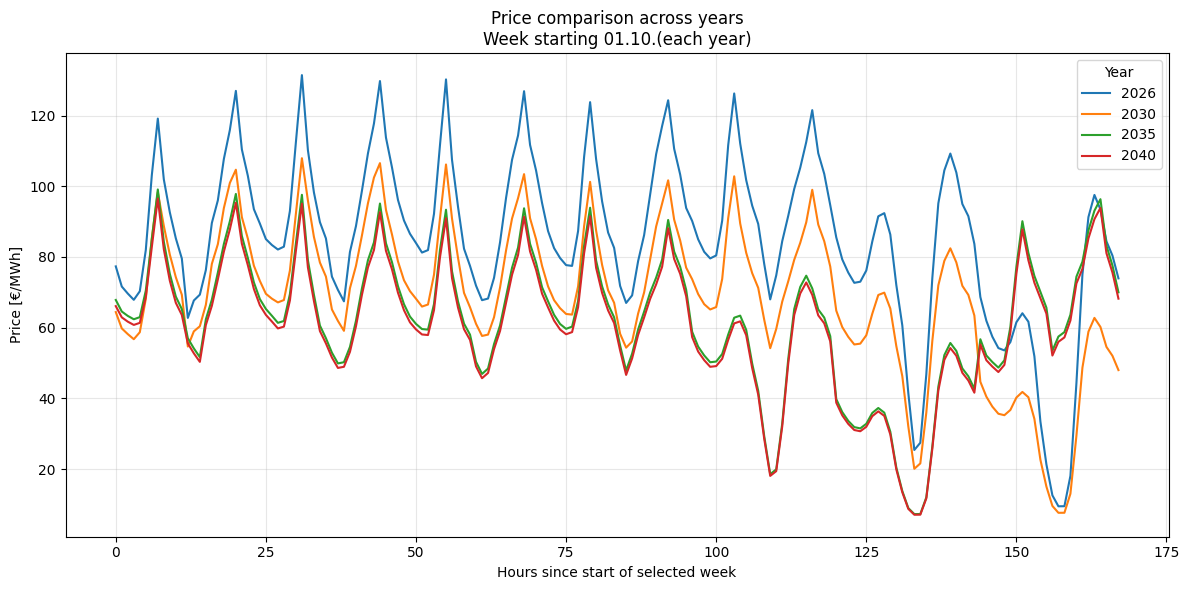

In [29]:
def plot_week_comparison(
    df: pd.DataFrame,
    years: list[int],
    month: int,
    day: int,
    days: int = 7
):
    """
    Plot a specific calendar week (same dates) across multiple years.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain ['Timestamp', 'Price'].
    years : list[int]
        Years to compare (e.g. [2026, 2030, 2035, 2040]).
    month : int
        Month of the start date (1-12).
    day : int
        Day of the month (1-31).
    days : int
        Number of days to plot (default 7).
    """

    df = df.copy()

    # Ensure Timestamp is datetime in DD.MM.YYYY HH:MM format
    if not pd.api.types.is_datetime64_any_dtype(df["Timestamp"]):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)

    # Convert Price to numeric (handle "43,21")
    df["Price"] = (
        df["Price"].astype(str).str.replace(",", ".", regex=False)
    )
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

    # Drop invalid price rows
    df = df.dropna(subset=["Price"])

    # Prepare plot
    plt.figure(figsize=(12, 6))
    plotted = False

    for yr in years:
        # Build the calendar start timestamp for this year
        start_ts = pd.Timestamp(year=yr, month=month, day=day, hour=0)
        end_ts = start_ts + timedelta(days=days)

        # Slice this window
        mask = (df["Timestamp"] >= start_ts) & (df["Timestamp"] < end_ts)
        df_slice = df[mask].copy()

        if df_slice.empty:
            print(f"⚠️ No data for {start_ts.date()} in year {yr}, skipping.")
            continue

        # Create x-axis: hours since start
        df_slice = df_slice.sort_values("Timestamp")
        df_slice["Hour"] = (df_slice["Timestamp"] - start_ts).dt.total_seconds() / 3600

        plt.plot(df_slice["Hour"], df_slice["Price"], label=str(yr))
        plotted = True

    if not plotted:
        print("⚠️ No valid data found for any selected years.")
        return

    plt.title(f"Price comparison across years\nWeek starting {day:02d}.{month:02d}.(each year)")
    plt.xlabel("Hours since start of selected week")
    plt.ylabel("Price [€/MWh]")
    plt.grid(alpha=0.3)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()


years_to_compare = [2026, 2030, 2035, 2040]
plot_week_comparison(
    filtered_df_hpfc,
    years=[2026, 2030, 2035, 2040],
    month=10,
    day=1,
    days=7
)